In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import shutil 


batch_size= 64

mean = -0.1
std=1
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../datasets/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (mean,), (std,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../datasets/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (mean,), (std,))
                             ])),
  batch_size=16, shuffle=False, drop_last= True)

for x,y in train_loader:
    break
    
vmin= x.min().item()
vmax= x.max().item()
print('range : ',vmin, vmax)

range :  0.10000000149011612 1.100000023841858


In [9]:
import torch
import shutil 
import numpy as np
from torch import nn
from modules.kernels import get_gaussian
from modules.models.decoder import simple_generator
from modules.models.forward_model import forward_modelA
from modules.models.forward_H import modelH
from modules.train_utils import train
from modules.custom_activations import inc_m
import matplotlib.pyplot as plt
from modules.models.preprocess_H_weights import ifft_2d_with_fftshift_real
from modules.noise import poisson_noise
from modules.models.classifiers import simple_mnist_classifier

device='cuda' if torch.cuda.is_available() else 'cpu'

classifier = simple_mnist_classifier(32).to(device)
classifier.load_state_dict(torch.load('saved_models/mnist_classifier.pth', map_location=device)['model_state_dict'])

<All keys matched successfully>

In [10]:
img_size= 32
m_inc_epoc= 1

def inc_1_after_60_interval_10(m, epoch):
    if epoch>60 and epoch%10==0:
        m=inc_m(m, epoch, 1)
    return m

sPSF= torch.tensor(get_gaussian(side_len=5, s=1)).float().to(device)
exPSF= torch.tensor(get_gaussian(side_len=5, s=1)).float().to(device)

criterion= nn.L1Loss().to(device)
train_model_iter, train_H_iter= 1, 1

## Test run

In [11]:
'''
from modules.custom_activations import sigmoid_custom as H_activation

T=5
H_init= 'fft'
H_weight_preprocess= ifft_2d_with_fftshift_real
m_inc_proc =inc_1_after_100_interval_10

decoder= simple_generator(T, img_size).to(device)
opt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)

H_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, device = device, initialization_bias=0, activation = H_activation, init_method= H_init).to(device)
opt_H= torch.optim.Adam(H_generator.parameters(), lr= 0.01)

noise=True # gradient exploding is not there (because I have added change the image range [1,2] -> which not contains 0s in it: forward_model.py)
train_model_iter, train_H_iter= 1, 1

train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, 10, 1, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, './1', noise, classifier, [mean, std])

'''

"\nfrom modules.custom_activations import sigmoid_custom as H_activation\n\nT=5\nH_init= 'fft'\nH_weight_preprocess= ifft_2d_with_fftshift_real\nm_inc_proc =inc_1_after_100_interval_10\n\ndecoder= simple_generator(T, img_size).to(device)\nopt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)\n\nH_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, device = device, initialization_bias=0, activation = H_activation, init_method= H_init).to(device)\nopt_H= torch.optim.Adam(H_generator.parameters(), lr= 0.01)\n\nnoise=True # gradient exploding is not there (because I have added change the image range [1,2] -> which not contains 0s in it: forward_model.py)\ntrain_model_iter, train_H_iter= 1, 1\n\ntrain(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, 10, 1, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, './1', noise, classifier, [mean, std])\n\n"

## Experiments

In [12]:
save_path= 'figs/test'


!rm -rf $save_path
!mkdir $save_path

In [13]:
n_gpus = torch.cuda.device_count()
print(f'n_gpus : {n_gpus}')

n_gpus : 0




RUNNING EXPERIMENT :: figs/test/noise(True)@T(16)@lr_H(0.001)
device : cpu
m : 1
yt range (train): [0.0023597516119480133 0.6807191371917725]
yt range (test): [0.0036862753331661224 0.6859461665153503]
training loop time (for single epoch): 448.04740047454834 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.07545804977416992, 0.3304930627346039]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


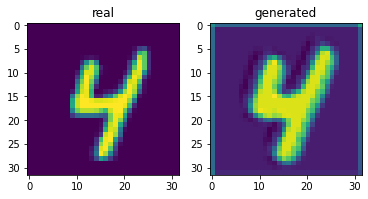

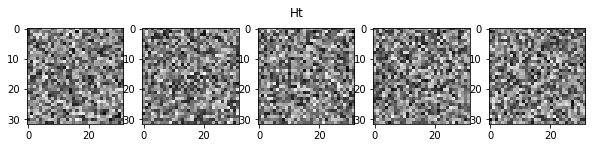

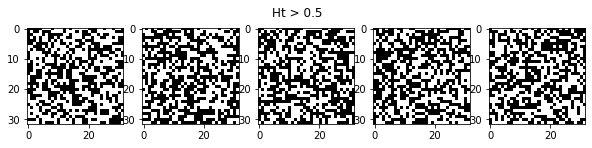

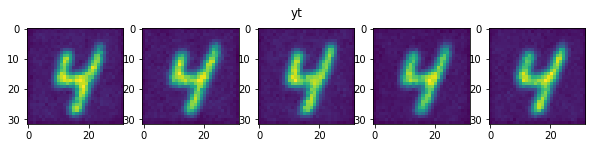

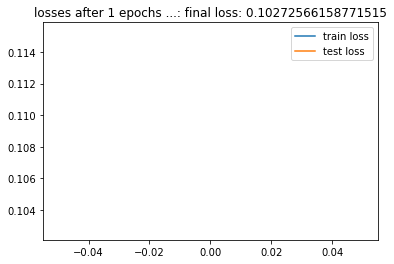

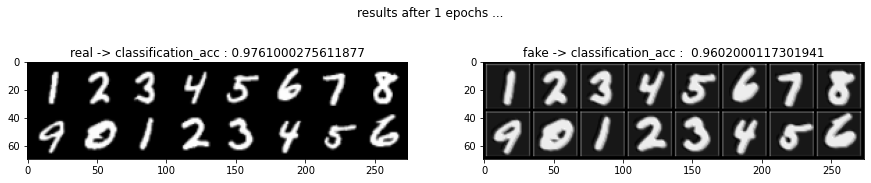

m : 1
yt range (train): [0.0018859412521123886 0.6762294769287109]
yt range (test): [0.003204667940735817 0.6979976296424866]
training loop time (for single epoch): 443.3140904903412 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.05889707803726196, 0.5310823321342468]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


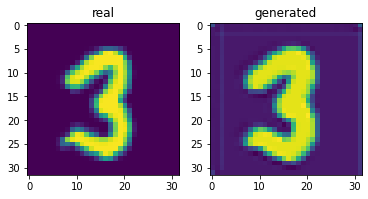

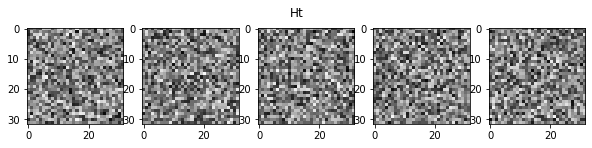

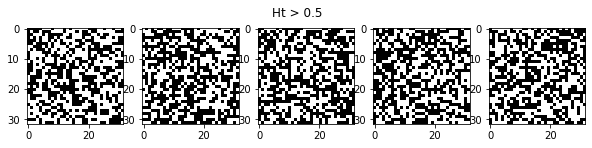

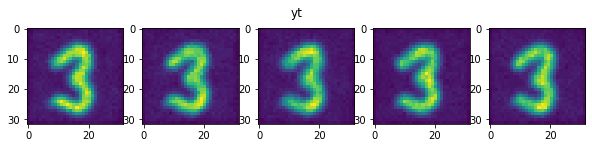

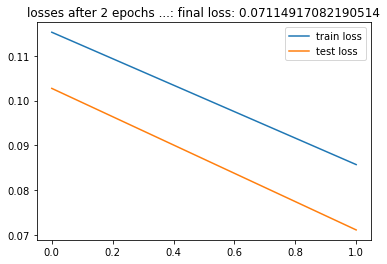

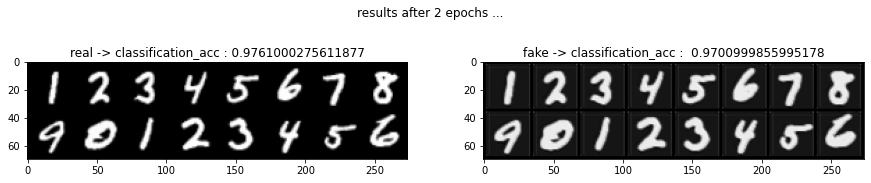

m : 1
yt range (train): [0.0022801337763667107 0.6805904507637024]
yt range (test): [0.0014515407383441925 0.6935743689537048]
training loop time (for single epoch): 446.83789134025574 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.06656146049499512, 0.7220433950424194]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


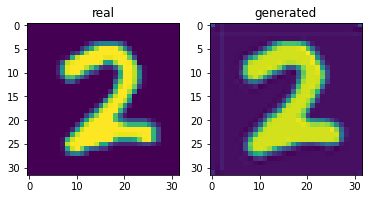

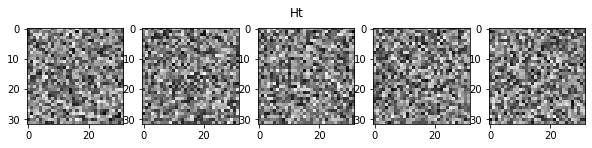

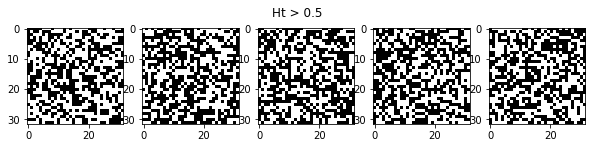

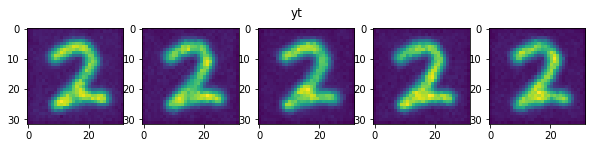

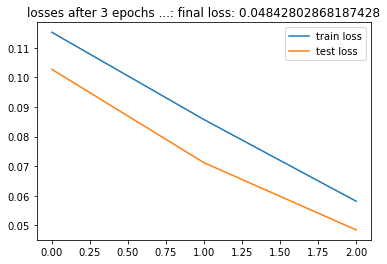

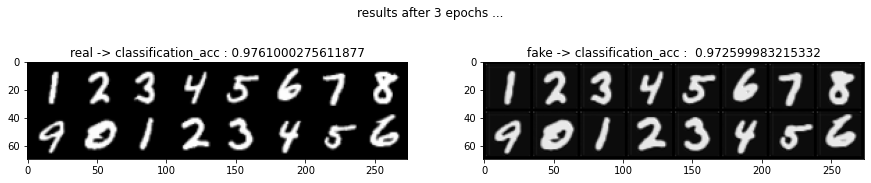

m : 1
yt range (train): [-0.0030112285166978836 0.6872906684875488]
yt range (test): [0.0005539702251553535 0.7038342356681824]
training loop time (for single epoch): 439.8329224586487 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.0726117491722107, 0.871820867061615]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


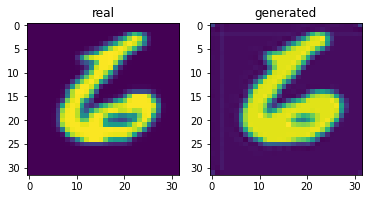

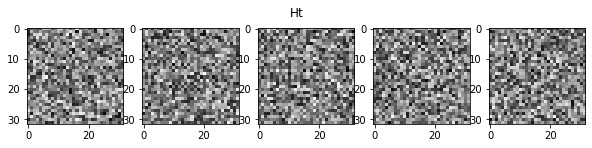

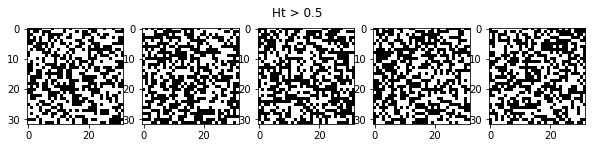

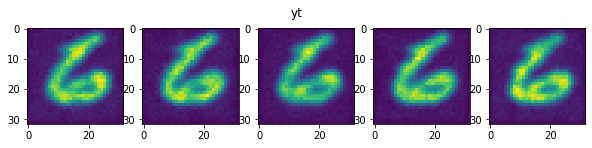

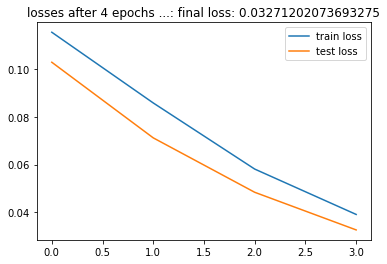

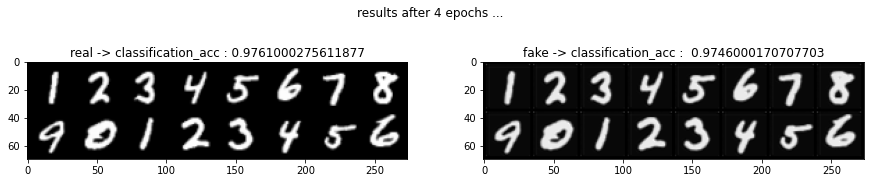

m : 1
yt range (train): [0.002485525794327259 0.7135800123214722]
yt range (test): [0.0018607191741466522 0.7288880348205566]
training loop time (for single epoch): 446.24855065345764 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.07765889167785645, 0.9841087460517883]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


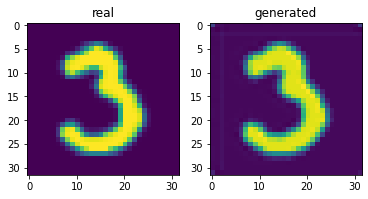

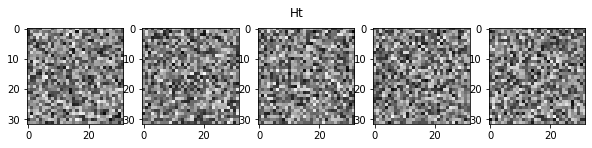

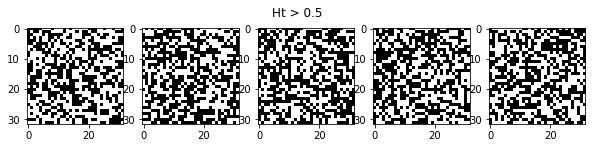

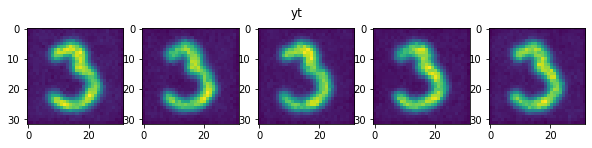

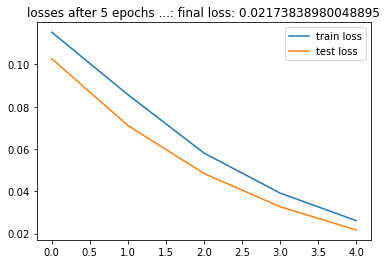

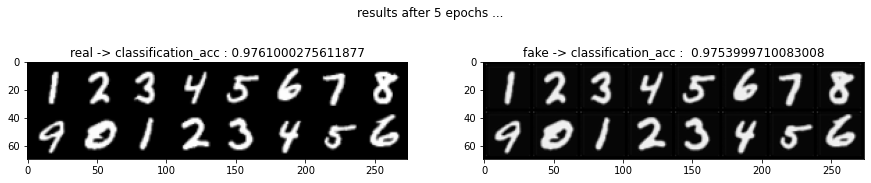

m : 1
yt range (train): [0.0009652609005570412 0.6918160319328308]
yt range (test): [0.003961745649576187 0.6956987977027893]
training loop time (for single epoch): 444.3089060783386 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.07905876636505127, 1.0691077709197998]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


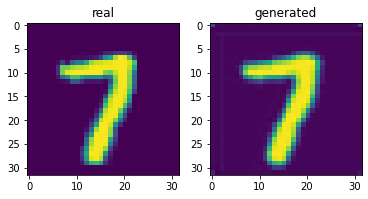

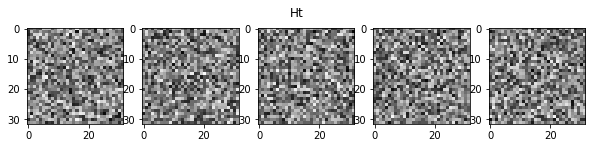

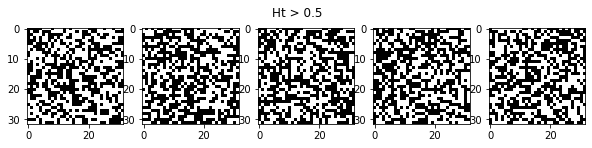

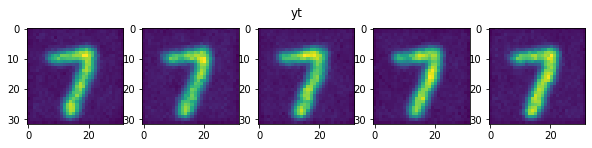

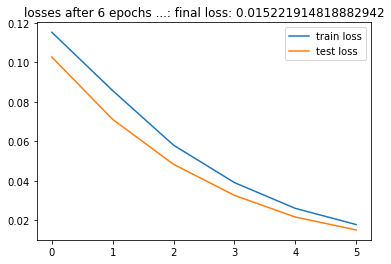

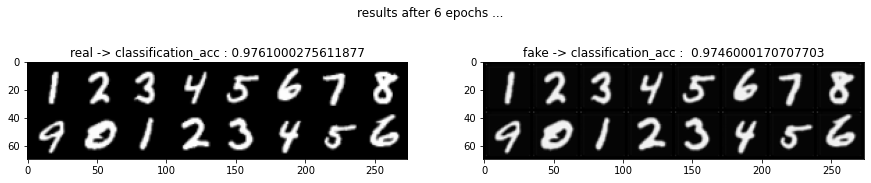

m : 1
yt range (train): [0.0006102127954363823 0.7028753757476807]
yt range (test): [0.001590881496667862 0.7010573744773865]
training loop time (for single epoch): 441.3275442123413 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.07661831378936768, 1.104695439338684]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


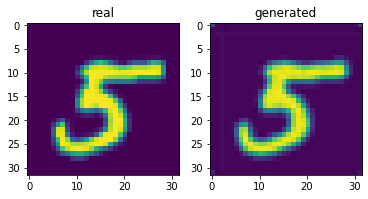

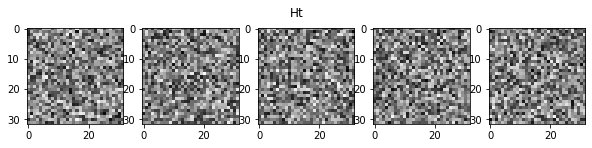

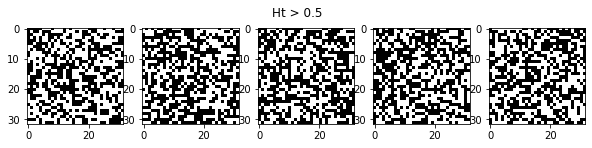

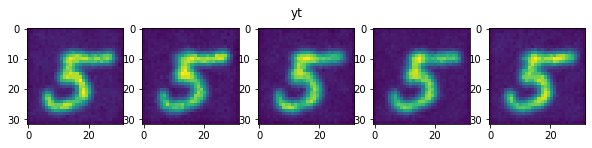

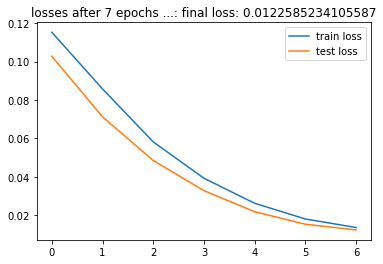

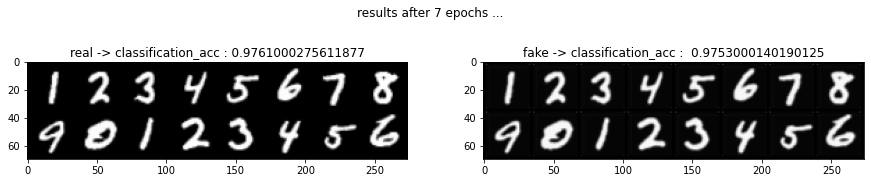

m : 1
yt range (train): [0.001743275672197342 0.6813151240348816]
yt range (test): [0.0023126043379306793 0.7090573906898499]
training loop time (for single epoch): 446.54060435295105 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.08014750480651855, 1.126418113708496]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


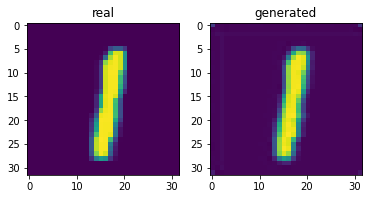

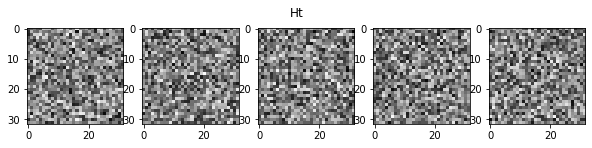

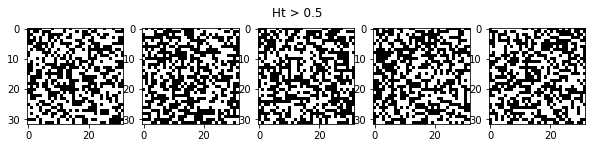

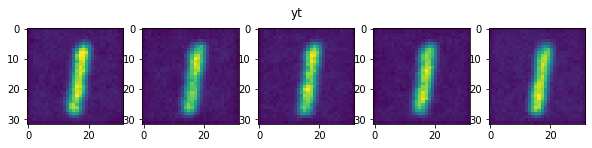

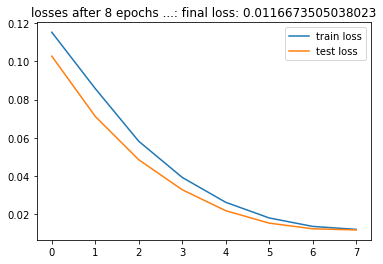

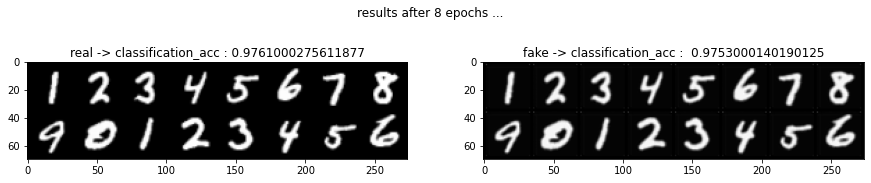

m : 1
yt range (train): [-0.0009287409484386444 0.7067844271659851]
yt range (test): [-0.0033629629760980606 0.7123937606811523]
training loop time (for single epoch): 444.84656023979187 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.07579195499420166, 1.1330695152282715]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


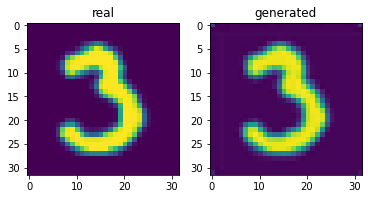

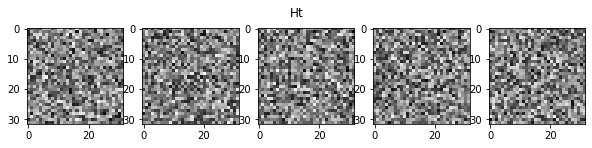

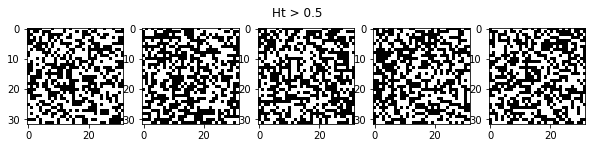

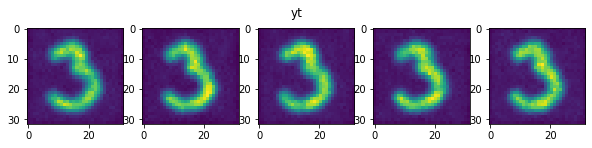

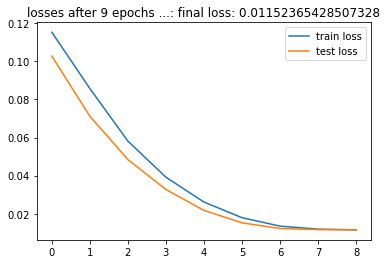

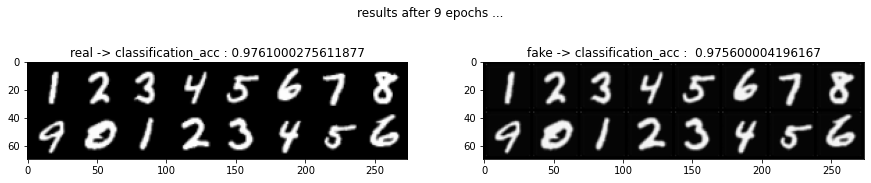

m : 1
yt range (train): [0.0015419935807585716 0.7025508880615234]
yt range (test): [0.003369833342730999 0.711329460144043]
training loop time (for single epoch): 441.46076226234436 sec
show images : X range : [0.10000000149011612, 1.100000023841858]
show images : X_hat range : [0.05203711986541748, 1.131352424621582]
X.min, X.max, X_hat.min, X_hat.max (after normalization):  tensor(0.) tensor(1.) tensor(0.) tensor(1.)


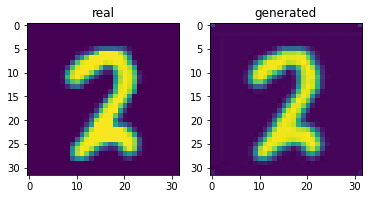

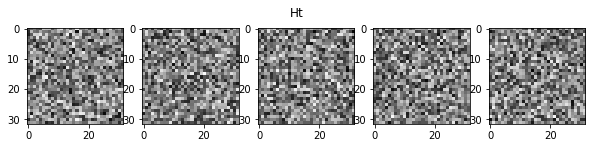

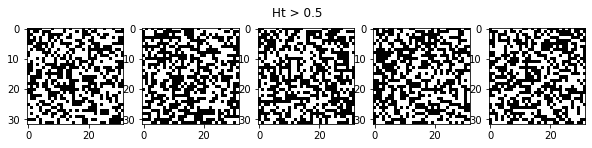

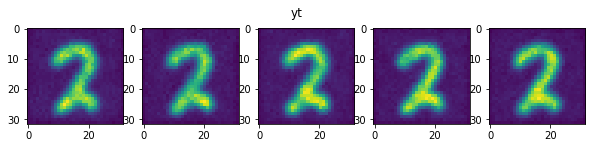

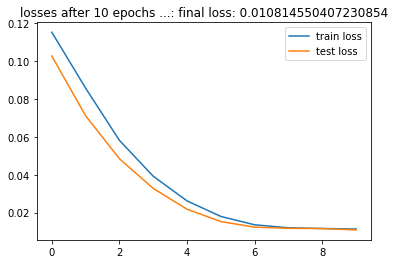

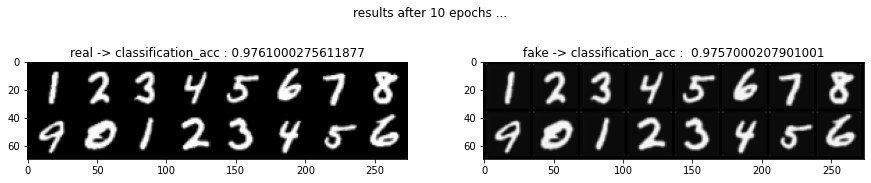

In [15]:
from modules.custom_activations import sigmoid_custom


H_init = 'fft'
H_complex_init= False #override by H_init
H_weight_preprocess= ifft_2d_with_fftshift_real
m_inc_proc =  inc_1_after_60_interval_10
initialization_bias= 0
H_activation= sigmoid_custom
noise_K=1000

epochs=10
show_results_epoch=1

T=16
noise= True
lrs_H= [0.001]

for lr_H in lrs_H:
    try:
        if H_weight_preprocess ==None:H_weight_preprocess_name = 'None'
        else:H_weight_preprocess_name = H_weight_preprocess.__name__
        if m_inc_proc==None:m_inc_proc_name = 'None'
        else:m_inc_proc_name = m_inc_proc.__name__

        save_dir= f'{save_path}/noise({noise})@T({T})@lr_H({lr_H})'
        print(f'\n\nRUNNING EXPERIMENT :: {save_dir}')

        try:shutil.rmtree(save_dir)
        except:pass

        #torch.manual_seed(torch_seed) #3

        if n_gpus<=1:
            decoder= simple_generator(T, img_size).to(device)
        else:
            decoder= nn.DataParallel(simple_generator(T, img_size)).to(device)
        opt_model= torch.optim.Adam(decoder.parameters(), lr= 0.001)

        #torch.manual_seed(torch_seed) #13
        H_generator = modelH(T, img_size = img_size, preprocess_H_weights= H_weight_preprocess, complex_init=H_complex_init, device = device, initialization_bias=initialization_bias, activation = H_activation, init_method= H_init).to(device)
        opt_H= torch.optim.Adam(H_generator.parameters(), lr= lr_H)

        train(decoder, forward_modelA, H_generator, sPSF, exPSF, criterion, [opt_model, opt_H], train_loader, test_loader, device, T, epochs, show_results_epoch, train_model_iter, train_H_iter, m_inc_epoc, m_inc_proc, save_dir, noise, classifier, [mean, std], noise_K)


    except Exception as e:
        print(f'ERROR :: {save_dir} :: {e}')
        pass

In [ ]:
# loop: (1gpu): training loop time (for single epoch): 29.820760488510132 sec
# loop: (2gpu): training loop time (for single epoch): 30.838639736175537 sec
